<a href="https://colab.research.google.com/github/martharegina/machinelearning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [88]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [89]:
# Cek jumlah missing values di train_data
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [90]:
# Cek jumlah missing values di test_data
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [91]:
# Hitung jumlah missing cabin per class
total_per_class = train_data.groupby('Pclass').size()
missing_cabin_per_class = train_data[train_data['Cabin'].isna()].groupby('Pclass').size()
fraction_missing = missing_cabin_per_class / total_per_class

result = {
    'Total per Class': total_per_class,
    'Missing Cabin per Class': missing_cabin_per_class,
    'Fraction Missing': fraction_missing
}

result_df = pd.DataFrame(result)
print(result_df)

        Total per Class  Missing Cabin per Class  Fraction Missing
Pclass                                                            
1                   216                       40          0.185185
2                   184                      168          0.913043
3                   491                      479          0.975560


In [92]:
# Hapus unnecessary columns
unnecessary_columns = ['Cabin', 'Ticket']
train_data = train_data.drop(unnecessary_columns, axis=1)
test_data = test_data.drop(unnecessary_columns, axis=1)

In [93]:
# Buat kolom Title
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [94]:
# Buat kolom FamilySize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

In [95]:
# Buat kolom IsAlone
def is_alone(row):
  if row['SibSp'] == 0 and row['Parch'] == 0:
    return 1
  else:
    return 0

train_data['IsAlone'] = train_data.apply(is_alone, axis=1)
test_data['IsAlone'] = test_data.apply(is_alone, axis=1)

In [96]:
# Buat df average umur per title
average_age_per_title = train_data.groupby('Title')['Age'].mean().astype(int)
average_age_per_title

,Age
Title,
Capt,70
Col,58
Countess,33
Don,40
Dr,42
Jonkheer,38
Lady,48
Major,48
Master,4


In [97]:
# Fill missing values kolom Age
train_data['Age'] = train_data['Age'].fillna(train_data['Title'].map(average_age_per_title))
test_data['Age'] = test_data['Age'].fillna(test_data['Title'].map(average_age_per_title))

In [98]:
# Fill missing values kolom Fare
median_fare = train_data['Fare'].median()
test_data['Fare'] = test_data['Fare'].fillna(median_fare)

In [99]:
# Fill missing values kolom Embarked
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(mode_embarked)

In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [101]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
 9   Title        418 non-null    object 
 10  FamilySize   418 non-null    int64  
 11  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


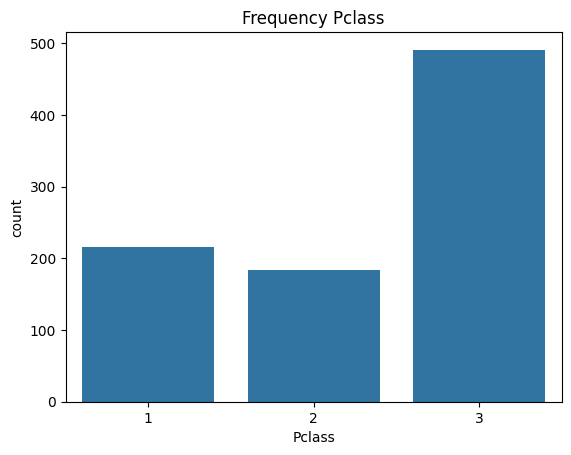

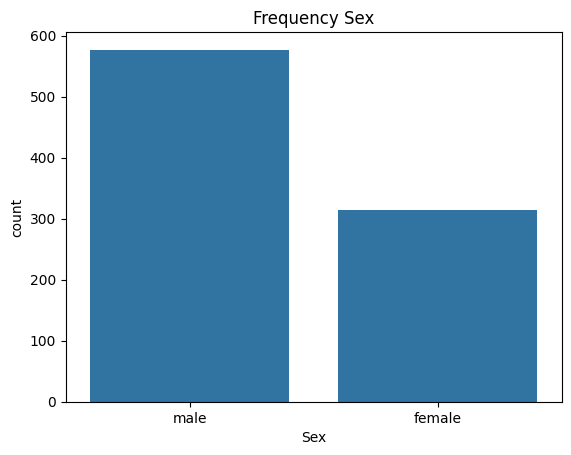

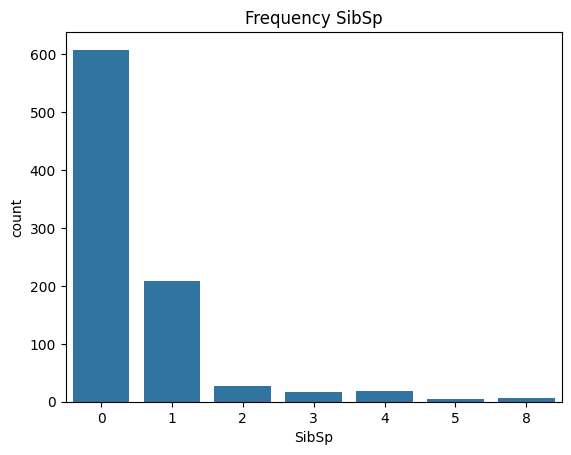

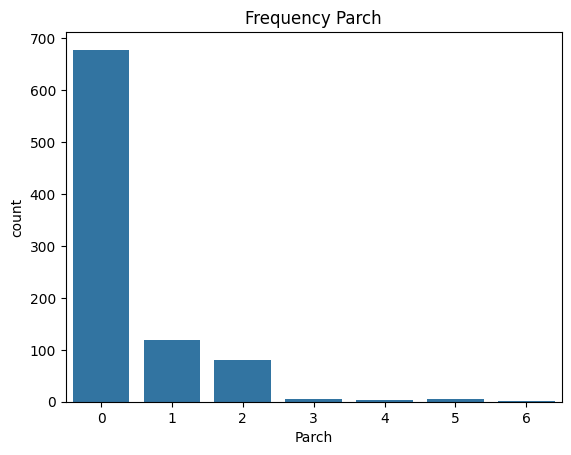

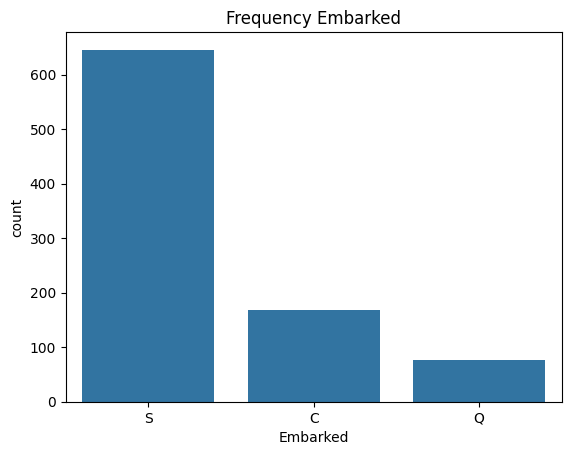

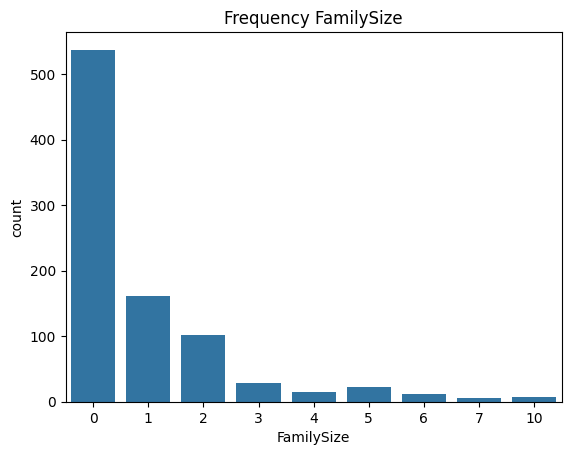

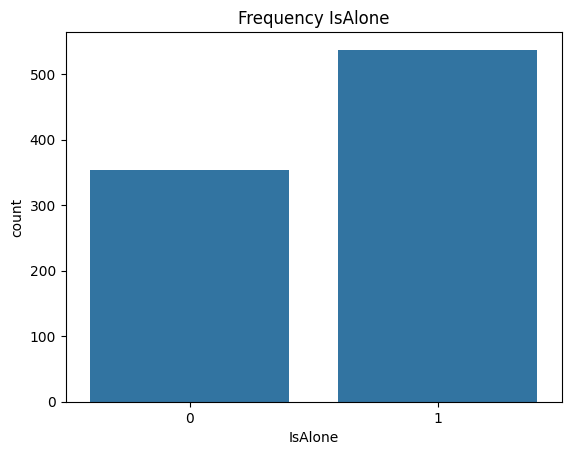

In [102]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone']

for col in cols:
  sns.countplot(data=train_data, x=col)
  plt.title('Frequency ' + col)
  plt.show()

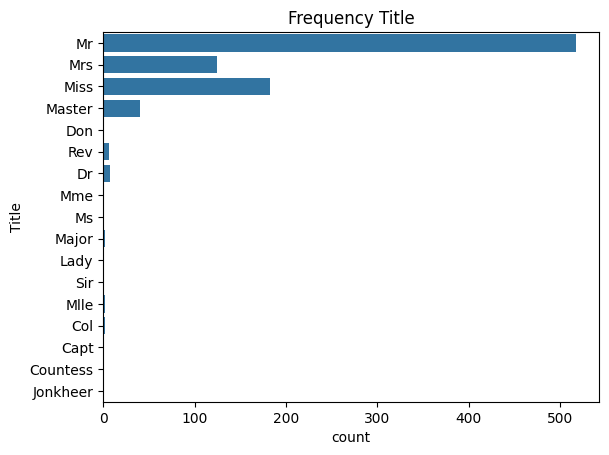

In [103]:
sns.countplot(data=train_data, y='Title')
plt.title('Frequency Title')
plt.show()

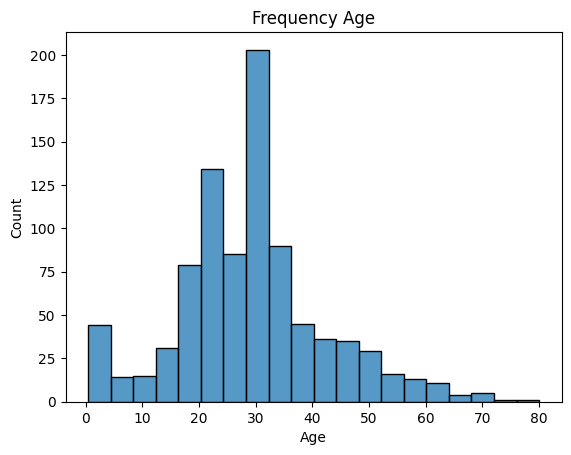

In [104]:
sns.histplot(train_data['Age'], bins=20)
plt.title('Frequency Age')
plt.show()

In [105]:
# One-hot encoding train data
encode_cols = ['Sex', 'Embarked']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(
    OH_encoder.fit_transform(train_data[encode_cols]),
    index=train_data.index,
    columns=OH_encoder.get_feature_names_out(encode_cols)
    )

OH_cols_train = OH_cols_train.astype(int)

train_data = train_data.drop(encode_cols, axis=1)
train_data = pd.concat([train_data, OH_cols_train], axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Title        891 non-null    object 
 9   FamilySize   891 non-null    int64  
 10  IsAlone      891 non-null    int64  
 11  Sex_female   891 non-null    int64  
 12  Sex_male     891 non-null    int64  
 13  Embarked_C   891 non-null    int64  
 14  Embarked_Q   891 non-null    int64  
 15  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 111.5+ KB


In [106]:
# One-hot encoding test data
OH_cols_test = pd.DataFrame(
    OH_encoder.transform(test_data[encode_cols]),
    index=test_data.index,
    columns=OH_encoder.get_feature_names_out(encode_cols)
    )

OH_cols_test = OH_cols_test.astype(int)

test_data = test_data.drop(encode_cols, axis=1)
test_data = pd.concat([test_data, OH_cols_test], axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Title        418 non-null    object 
 8   FamilySize   418 non-null    int64  
 9   IsAlone      418 non-null    int64  
 10  Sex_female   418 non-null    int64  
 11  Sex_male     418 non-null    int64  
 12  Embarked_C   418 non-null    int64  
 13  Embarked_Q   418 non-null    int64  
 14  Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 49.1+ KB


In [ ]:
# Deteksi outlier

The plan:
* feature engineering: title dari nama, family size, isAlone
* fill missing value age berdasarkan rata-rata title
* encoding categorical values
* decide which one is target dan yang mana yang features
* lihat distribusi masing-masing
* bandingkan fitur terhadap survived
* split data
* pemilihan model
* evaluasi model